## Movie Reviews Classification
### Using Recurrent Neural Networks

In [11]:
import keras
keras.__version__

'2.15.0'

In [2]:
from keras.layers import SimpleRNN

`SimpleRNN` processes batches of sequences.

It takes inputs of shape `(batch_size, timesteps, input_features)`

In [3]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # number of words to consider as features
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)
print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (sample x time)
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


Training a recurrent network using an `Embedding` layer and s `SimpleRNN` layer

In [12]:
from keras.layers import Dense, Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train,
                   epochs = 10,
                   batch_size = 128,
                   validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 23s 136ms/step - loss: 0.5876 - acc: 0.6754 - val_loss: 0.4539 - val_acc: 0.7942
Epoch 2/10
157/157 [==============================] - 20s 130ms/step - loss: 0.3820 - acc: 0.8396 - val_loss: 0.4355 - val_acc: 0.8026
Epoch 3/10
157/157 [==============================] - 20s 129ms/step - loss: 0.3026 - acc: 0.8795 - val_loss: 0.3708 - val_acc: 0.8388
Epoch 4/10
157/157 [==============================] - 20s 129ms/step - loss: 0.2626 - acc: 0.8962 - val_loss: 0.3750 - val_acc: 0.8462
Epoch 5/10
157/157 [==============================] - 20s 129ms/step - loss: 0.2229 - acc: 0.9141 - val_loss: 0.4832 - val_acc: 0.7948
Epoch 6/10
157/157 [==============================] - 20s 128ms/step - loss: 0.1701 - acc: 0.9384 - val_loss: 0.3870 - val_acc: 0.8642
Epoch 7/10
157/157 [==============================] - 20s 130ms/step - loss: 0.1260 - acc: 0.9579 - val_loss: 0.4157 - val_acc: 0.8650
Epoch 8/10
157/157 [==============================] - 2

### Displaying training and validation loss and accuracy

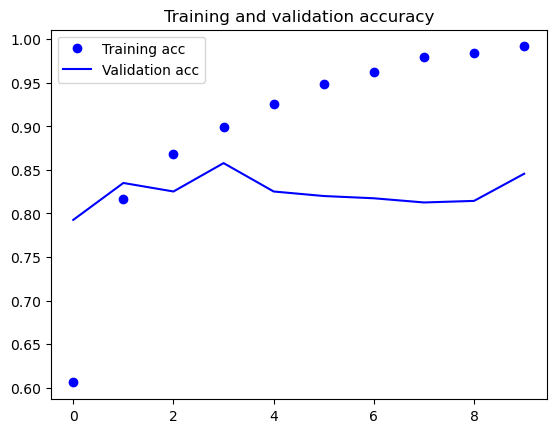

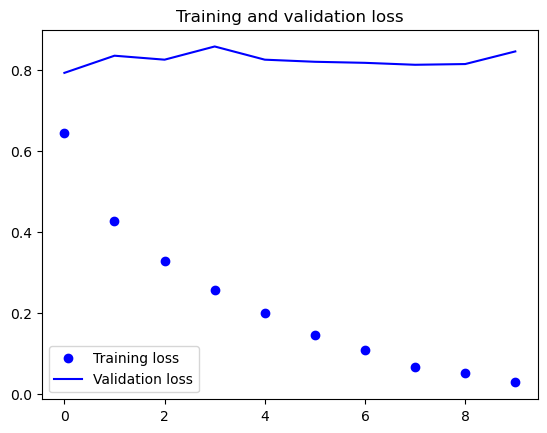

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_acc, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM example in Keras

In [9]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 105s 636ms/step - loss: 0.6162 - acc: 0.6836 - val_loss: 0.4566 - val_acc: 0.8144
Epoch 2/10
157/157 [==============================] - 80s 508ms/step - loss: 0.3642 - acc: 0.8529 - val_loss: 0.3711 - val_acc: 0.8416
Epoch 3/10
157/157 [==============================] - 82s 520ms/step - loss: 0.2782 - acc: 0.8937 - val_loss: 0.3119 - val_acc: 0.8722
Epoch 4/10
157/157 [==============================] - 89s 564ms/step - loss: 0.2332 - acc: 0.9140 - val_loss: 0.3324 - val_acc: 0.8812
Epoch 5/10
157/157 [==============================] - 83s 529ms/step - loss: 0.1988 - acc: 0.9273 - val_loss: 0.3655 - val_acc: 0.8674
Epoch 6/10
157/157 [==============================] - 89s 566ms/step - loss: 0.1812 - acc: 0.9355 - val_loss: 0.3056 - val_acc: 0.8824
Epoch 7/10
157/157 [==============================] - 6443s 41s/step - loss: 0.1623 - acc: 0.9430 - val_loss: 0.3864 - val_acc: 0.8714
Epoch 8/10
157/157 [==============================] - 

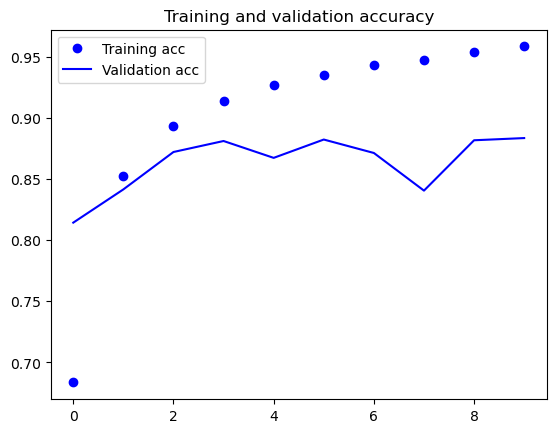

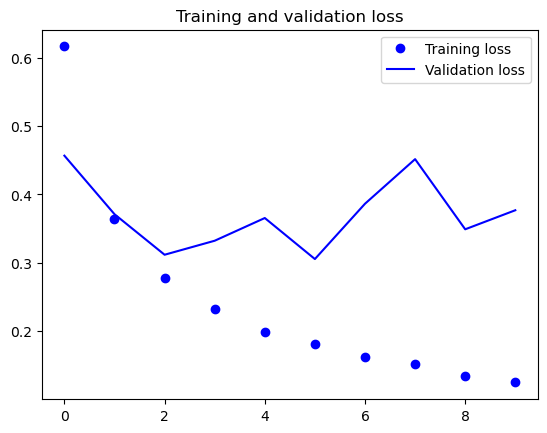

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()